# UNSUPERVISED FEATURE SELECTION FOR TIME-SERIES SENSOR DATA 
    - Evaluation based comparision with PCA, IPCA, AND variation-trend-relationship-capture algorithm within MSDA package

In [ ]:
We test PCA/IPCA/MSDA on one of Alibaba cloud virtual machine’s data containing the following attributes:- 
- CPU utilization percentage (cpu_util_percent), 
- memory utilization percentage (mem_util_percent),
- normalized memory bandwidth (mem_gps),
- cache miss per thousand instruction (mkpi), 
- normalized incoming network traffic (net_in), 
- normalized outgoing network traffic (net_out), 
- disk I/O percentage (disk_io_percent). 

In [237]:
%matplotlib inline
import pandas as pd # for using pandas daraframe
import numpy as np # for some math operations
from sklearn.preprocessing import StandardScaler # for standardizing the data
from sklearn.decomposition import PCA # for PCA calculation
import matplotlib.pyplot as plt # for plotting
import matplotlib.patches as mpatches

In [2]:
df = pd.read_excel('m_1.xlsx', index_col = 0) 
df.shape

(46368, 8)

In [3]:
df.columns

Index(['machine_id', 'cpu_util_percent', 'mem_util_percent', 'mem_gps', 'mkpi',
       'net_in', 'net_out', 'disk_io_percent'],
      dtype='object')

In [4]:
df.head()

,machine_id,cpu_util_percent,mem_util_percent,mem_gps,mkpi,net_in,net_out,disk_io_percent
timestamp,,,,,,,,
2011-05-01 12:00:10,m_1,13,84,NaN,NaN,32.46,23.09,1
2011-05-01 12:00:20,m_1,10,84,NaN,NaN,32.46,23.09,1
2011-05-01 12:00:30,m_1,11,84,NaN,NaN,32.46,23.09,1
2011-05-01 12:00:40,m_1,12,84,NaN,NaN,32.46,23.09,1
2011-05-01 12:00:50,m_1,12,84,NaN,NaN,32.46,23.09,1


In [5]:
df.dtypes

machine_id           object
cpu_util_percent      int64
mem_util_percent      int64
mem_gps             float64
mkpi                float64
net_in              float64
net_out             float64
disk_io_percent       int64
dtype: object

In [6]:
df.drop('machine_id', axis=1, inplace=True)
df.head()

,cpu_util_percent,mem_util_percent,mem_gps,mkpi,net_in,net_out,disk_io_percent
timestamp,,,,,,,
2011-05-01 12:00:10,13,84,NaN,NaN,32.46,23.09,1
2011-05-01 12:00:20,10,84,NaN,NaN,32.46,23.09,1
2011-05-01 12:00:30,11,84,NaN,NaN,32.46,23.09,1
2011-05-01 12:00:40,12,84,NaN,NaN,32.46,23.09,1
2011-05-01 12:00:50,12,84,NaN,NaN,32.46,23.09,1


In [7]:
df = df.fillna(0)

In [8]:
df.head()

,cpu_util_percent,mem_util_percent,mem_gps,mkpi,net_in,net_out,disk_io_percent
timestamp,,,,,,,
2011-05-01 12:00:10,13,84,0.0,0.0,32.46,23.09,1
2011-05-01 12:00:20,10,84,0.0,0.0,32.46,23.09,1
2011-05-01 12:00:30,11,84,0.0,0.0,32.46,23.09,1
2011-05-01 12:00:40,12,84,0.0,0.0,32.46,23.09,1
2011-05-01 12:00:50,12,84,0.0,0.0,32.46,23.09,1


# Standardizing the data: 
We will be using sklearn.preprocessing.StandardScaler library. It standardize the features by removing the mean and scaling to unit variance. It arranges the data in the normal distribution.

In [9]:
X = df.values # getting all values as matrix of dataframe
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X) # Standardizing the data

In [10]:
X_std

array([[-1.77431614, -1.17219686,  0.        , ..., -1.90564543,
        -1.901297  , -1.04834952],
       [-2.02060848, -1.17219686,  0.        , ..., -1.90564543,
        -1.901297  , -1.04834952],
       [-1.93851103, -1.17219686,  0.        , ..., -1.90564543,
        -1.901297  , -1.04834952],
       ...,
       [ 0.11392508,  0.86768409,  0.        , ...,  1.61984996,
         1.66843845,  0.14767121],
       [ 0.03182763,  0.86768409,  0.        , ...,  1.61984996,
         1.66843845,  0.6260795 ],
       [ 0.27811997,  0.86768409,  0.        , ...,  1.61984996,
         1.66843845,  0.6260795 ]])

# Apply PCA: 
An important attribute as part of it is n_components which tells the number of components to keep after applying PCA. If n_components is not set all components are kept.

If n_components == 'mle' and svd_solver == 'full', Minka’s MLE is used to guess the dimension. Use of n_components == 'mle' will interpret svd_solver == 'auto' as svd_solver == 'full'.
If 0 < n_components < 1 and svd_solver == 'full', select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.

Currently, we will apply PCA without passing any parameters for the initialization of the object which means all the components are kept.

In [11]:
pca = PCA()
X_pca = pca.fit(X_std)

# Determine the number of components: 

An important part of using PCA is to estimate how many components are needed to describe the data.

You can get the 

* eigenvectors using pca.components_
* eigenvalues using pca.explained_variance_
* Percentage of variance explained by each of the selected components using pca.explained_variance_ratio_


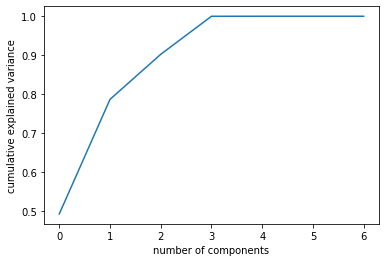

In [12]:
"""

The number of components needed can be determined 
by looking at the cumulative explained variance ratio as a 
function of the number of components as shown in the below graph.

This curve quantifies how much of the total, 
the 7-dimensional variance is contained within the first N components. 
For example, we see that the first two components contain approximately
80% of the variance, while we need 4 components 
to describe close to 100% of the variance. 
Which means we can reduce our data dimension 
to 4 from 7 without much loss of the data.
"""
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# Dimensionality Reduction:
Now we know that we need 4 components only, so we can apply PCA with 4 components to get the reduced dataset.

In [13]:
num_components = 3
pca = PCA(num_components)  
X_pca = pca.fit_transform(X_std) # fit and reduce dimension

In [14]:
X_pca

array([[ 3.23320013, -1.38933374, -0.17276804],
       [ 3.26240385, -1.5615307 , -0.12256924],
       [ 3.25266928, -1.50413171, -0.13930218],
       ...,
       [-2.4447684 , -0.30886142,  0.31331415],
       [-2.50476744, -0.0387298 ,  0.48389622],
       [-2.53397115,  0.13346716,  0.43369742]])

# Combining together (optional)
One can do the steps Determine the number of components & Dimensionality Reduction together by specifying n_components = 0.99 parameter. PCA will select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components

In [13]:
pca = PCA(n_components = 0.99)
X_pca = pca.fit_transform(X_std) # this will fit and reduce dimensions
print(pca.n_components_) # one can print and see how many components are selected. In this case it is 4 same as above we saw in step 5

4


# Finding the most important features set
Now for identifying the most important feature, we have to check which features are contributing most to the components. We can see which features are contributing most to which components as shown by highlighting in the below figure (net_in, cpu_util_percent, mem_util_percent, cpu_util_percent).

In [14]:
pd.DataFrame(pca.components_, columns = df.columns)

,cpu_util_percent,mem_util_percent,mem_gps,mkpi,net_in,net_out,disk_io_percent
0,-0.118573,-0.478128,-0.000000e+00,-1.387779e-17,-0.607107,-0.606225,-0.145762
1,0.699157,-0.013101,0.000000e+00,0.000000e+00,-0.143500,-0.147322,0.684626
2,-0.203818,-0.818723,1.387779e-17,-1.110223e-16,0.302247,0.305581,0.321585
3,-0.674959,0.317664,-5.551115e-17,2.775558e-17,-0.136464,-0.135183,0.637670


# process of extracting important features 

In [15]:
n_pcs = pca.n_components_ # get number of component

# get the index of the most important feature on EACH component

most_important = [np.abs(pca.components_[i]).argmax() for i in 
                  range(n_pcs)]

intial_feature_names = df.columns

# get the most important feature names

most_important_feature_names = [intial_feature_names[most_important[i]]
                               for i in range(n_pcs)]

most_important_feature_names

['net_in', 'cpu_util_percent', 'mem_util_percent', 'cpu_util_percent']

# IPCA

In [16]:
X_std.shape

(46368, 7)

In [17]:
from sklearn.decomposition import IncrementalPCA

In [18]:
ipca = IncrementalPCA(n_components = 4, batch_size=10)
X_ipca = ipca.fit_transform(X_std)
print(ipca.n_components_)

4


In [19]:
pd.DataFrame(ipca.components_, columns = df.columns)

,cpu_util_percent,mem_util_percent,mem_gps,mkpi,net_in,net_out,disk_io_percent
0,0.118573,0.478128,7.335266e-15,-5.221902e-17,0.607107,0.606225,0.145762
1,0.699157,-0.013101,-4.853272e-15,2.673223e-16,-0.143500,-0.147322,0.684626
2,0.203818,0.818723,7.682065e-15,6.115074e-15,-0.302248,-0.305580,-0.321585
3,0.674959,-0.317664,5.565312e-15,-2.053319e-15,0.136465,0.135182,-0.637670


In [20]:
n_pcs_ipca = ipca.n_components_
most_important_ipca = [np.abs(ipca.components_[i]).argmax() for i in range(n_pcs_ipca)]
initial_feature_names = df.columns

#get most important feature names
most_important_feature_names_ipca = [initial_feature_names[most_important_ipca[i]] 
                                     for i in range(n_pcs_ipca)]

most_important_feature_names_ipca

['net_in', 'cpu_util_percent', 'mem_util_percent', 'cpu_util_percent']

In [21]:
err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
print("Mean absolute unsigned error {}" .format(err))

Mean absolute unsigned error 1.7840408966280437e-08


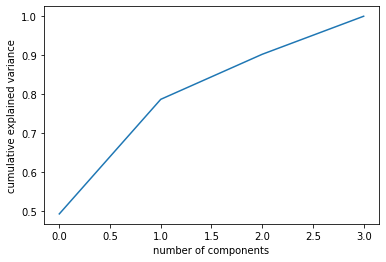

In [22]:
"""

The number of components needed can be determined 
by looking at the cumulative explained variance ratio as a 
function of the number of components as shown in the below graph.

This curve quantifies how much of the total, 
the 7-dimensional variance is contained within the first N components. 
For example, we see that the first two components contain approximately
80% of the variance, while we need 4 components 
to describe close to 100% of the variance. 
Which means we can reduce our data dimension 
to 4 from 7 without much loss of the data.
"""
plt.plot(np.cumsum(ipca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# variation-trend-relationship capture algorithm (core of the MSDA workflow)

In [23]:
from datetime import datetime

In [24]:
df1 = pd.read_excel('m_1.xlsx')

In [25]:
df1.head()

,timestamp,machine_id,cpu_util_percent,mem_util_percent,mem_gps,mkpi,net_in,net_out,disk_io_percent
0,2011-05-01 12:00:10,m_1,13,84,NaN,NaN,32.46,23.09,1
1,2011-05-01 12:00:20,m_1,10,84,NaN,NaN,32.46,23.09,1
2,2011-05-01 12:00:30,m_1,11,84,NaN,NaN,32.46,23.09,1
3,2011-05-01 12:00:40,m_1,12,84,NaN,NaN,32.46,23.09,1
4,2011-05-01 12:00:50,m_1,12,84,NaN,NaN,32.46,23.09,1


In [26]:
df1.dtypes

timestamp           datetime64[ns]
machine_id                  object
cpu_util_percent             int64
mem_util_percent             int64
mem_gps                    float64
mkpi                       float64
net_in                     float64
net_out                    float64
disk_io_percent              int64
dtype: object

In [27]:
df1['Date'] = [d.date() for d in df1.timestamp]
df1['Time'] = [d.time() for d in df1.timestamp]

In [28]:
df1.columns

Index(['timestamp', 'machine_id', 'cpu_util_percent', 'mem_util_percent',
       'mem_gps', 'mkpi', 'net_in', 'net_out', 'disk_io_percent', 'Date',
       'Time'],
      dtype='object')

In [29]:
df1.head()

,timestamp,machine_id,cpu_util_percent,mem_util_percent,mem_gps,mkpi,net_in,net_out,disk_io_percent,Date,Time
0,2011-05-01 12:00:10,m_1,13,84,NaN,NaN,32.46,23.09,1,2011-05-01,12:00:10
1,2011-05-01 12:00:20,m_1,10,84,NaN,NaN,32.46,23.09,1,2011-05-01,12:00:20
2,2011-05-01 12:00:30,m_1,11,84,NaN,NaN,32.46,23.09,1,2011-05-01,12:00:30
3,2011-05-01 12:00:40,m_1,12,84,NaN,NaN,32.46,23.09,1,2011-05-01,12:00:40
4,2011-05-01 12:00:50,m_1,12,84,NaN,NaN,32.46,23.09,1,2011-05-01,12:00:50


In [30]:
df1 = df1[['timestamp', 'Date', 'Time','machine_id', 'cpu_util_percent', 'mem_util_percent',
       'mem_gps', 'mkpi', 'net_in', 'net_out', 'disk_io_percent']]

In [31]:
df1.head()

,timestamp,Date,Time,machine_id,cpu_util_percent,mem_util_percent,mem_gps,mkpi,net_in,net_out,disk_io_percent
0,2011-05-01 12:00:10,2011-05-01,12:00:10,m_1,13,84,NaN,NaN,32.46,23.09,1
1,2011-05-01 12:00:20,2011-05-01,12:00:20,m_1,10,84,NaN,NaN,32.46,23.09,1
2,2011-05-01 12:00:30,2011-05-01,12:00:30,m_1,11,84,NaN,NaN,32.46,23.09,1
3,2011-05-01 12:00:40,2011-05-01,12:00:40,m_1,12,84,NaN,NaN,32.46,23.09,1
4,2011-05-01 12:00:50,2011-05-01,12:00:50,m_1,12,84,NaN,NaN,32.46,23.09,1


In [32]:
df1.dtypes

timestamp           datetime64[ns]
Date                        object
Time                        object
machine_id                  object
cpu_util_percent             int64
mem_util_percent             int64
mem_gps                    float64
mkpi                       float64
net_in                     float64
net_out                    float64
disk_io_percent              int64
dtype: object

In [33]:
df1 = df1.drop(['timestamp','machine_id'], axis=1)
df1.head()

,Date,Time,cpu_util_percent,mem_util_percent,mem_gps,mkpi,net_in,net_out,disk_io_percent
0,2011-05-01,12:00:10,13,84,NaN,NaN,32.46,23.09,1
1,2011-05-01,12:00:20,10,84,NaN,NaN,32.46,23.09,1
2,2011-05-01,12:00:30,11,84,NaN,NaN,32.46,23.09,1
3,2011-05-01,12:00:40,12,84,NaN,NaN,32.46,23.09,1
4,2011-05-01,12:00:50,12,84,NaN,NaN,32.46,23.09,1


In [34]:
df1.tail()

,Date,Time,cpu_util_percent,mem_util_percent,mem_gps,mkpi,net_in,net_out,disk_io_percent
46363,2011-05-07,16:37:30,51,94,NaN,NaN,41.94,29.46,6
46364,2011-05-07,16:37:40,55,94,NaN,NaN,41.94,29.47,6
46365,2011-05-07,16:37:50,36,94,NaN,NaN,41.94,29.47,6
46366,2011-05-07,16:38:00,35,94,NaN,NaN,41.94,29.47,8
46367,2011-05-07,16:38:10,38,94,NaN,NaN,41.94,29.47,8


In [35]:
df1.shape

(46368, 9)

In [36]:
df1 = df1.fillna(0)

In [37]:
df1.head()

,Date,Time,cpu_util_percent,mem_util_percent,mem_gps,mkpi,net_in,net_out,disk_io_percent
0,2011-05-01,12:00:10,13,84,0.0,0.0,32.46,23.09,1
1,2011-05-01,12:00:20,10,84,0.0,0.0,32.46,23.09,1
2,2011-05-01,12:00:30,11,84,0.0,0.0,32.46,23.09,1
3,2011-05-01,12:00:40,12,84,0.0,0.0,32.46,23.09,1
4,2011-05-01,12:00:50,12,84,0.0,0.0,32.46,23.09,1


In [38]:
df1.cpu_util_percent.value_counts()

26    1739
24    1691
25    1634
30    1629
28    1590
      ... 
86       2
84       2
90       2
8        2
89       1
Name: cpu_util_percent, Length: 85, dtype: int64

In [39]:
df1.dtypes

Date                 object
Time                 object
cpu_util_percent      int64
mem_util_percent      int64
mem_gps             float64
mkpi                float64
net_in              float64
net_out             float64
disk_io_percent       int64
dtype: object

In [40]:
df1.columns

Index(['Date', 'Time', 'cpu_util_percent', 'mem_util_percent', 'mem_gps',
       'mkpi', 'net_in', 'net_out', 'disk_io_percent'],
      dtype='object')

In [41]:
time_sec = []
initial=0
for i in range(len(df1.Time)):
    time_sec.append(initial)
    initial+=10

In [42]:
time_sec

[0,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 210,
 220,
 230,
 240,
 250,
 260,
 270,
 280,
 290,
 300,
 310,
 320,
 330,
 340,
 350,
 360,
 370,
 380,
 390,
 400,
 410,
 420,
 430,
 440,
 450,
 460,
 470,
 480,
 490,
 500,
 510,
 520,
 530,
 540,
 550,
 560,
 570,
 580,
 590,
 600,
 610,
 620,
 630,
 640,
 650,
 660,
 670,
 680,
 690,
 700,
 710,
 720,
 730,
 740,
 750,
 760,
 770,
 780,
 790,
 800,
 810,
 820,
 830,
 840,
 850,
 860,
 870,
 880,
 890,
 900,
 910,
 920,
 930,
 940,
 950,
 960,
 970,
 980,
 990,
 1000,
 1010,
 1020,
 1030,
 1040,
 1050,
 1060,
 1070,
 1080,
 1090,
 1100,
 1110,
 1120,
 1130,
 1140,
 1150,
 1160,
 1170,
 1180,
 1190,
 1200,
 1210,
 1220,
 1230,
 1240,
 1250,
 1260,
 1270,
 1280,
 1290,
 1300,
 1310,
 1320,
 1330,
 1340,
 1350,
 1360,
 1370,
 1380,
 1390,
 1400,
 1410,
 1420,
 1430,
 1440,
 1450,
 1460,
 1470,
 1480,
 1490,
 1500,
 1510,
 1520,
 1530,
 1540,
 1550,
 1560,
 1570,
 1580

In [43]:
# function to find variation (like Increase/Inc, Decrease/Dec, Equal/Eql) in each column from previous values
def count_trend(list):
    inc, dec, eql, j = 0, 0, 0, 0
    while j!=len(list)-1:
        if list[j]>list[j+1]:
            dec+=1
            j+=1
        elif list[j]<list[j+1]:
            inc+=1
            j+=1
        else:
            eql+=1
            j+=1
    return {'Inc':inc, 'Dec':dec, 'Eql':eql}

In [44]:
df1.columns

Index(['Date', 'Time', 'cpu_util_percent', 'mem_util_percent', 'mem_gps',
       'mkpi', 'net_in', 'net_out', 'disk_io_percent'],
      dtype='object')

In [194]:
Date, Time, cpu_util_percent, mem_util_percent, net_in, net_out, disk_io_percent  = [],[],[],[],[],[],[]
Date.append(df1.Date)
Time.append(df1.Time)
cpu_util_percent.append(df1.cpu_util_percent)
mem_util_percent.append(df1.mem_util_percent)
net_in.append(df1.net_in)
net_out.append(df1.net_out)
disk_io_percent.append(df1.disk_io_percent)

In [199]:
cpu_util_percent

[0        13
 1        10
 2        11
 3        12
 4        12
          ..
 46363    51
 46364    55
 46365    36
 46366    35
 46367    38
 Name: cpu_util_percent, Length: 46368, dtype: int64]

In [224]:
mem_util_percent

[0        84
 1        84
 2        84
 3        84
 4        84
          ..
 46363    94
 46364    94
 46365    94
 46366    94
 46367    94
 Name: mem_util_percent, Length: 46368, dtype: int64]

In [225]:
net_in

[0        32.46
 1        32.46
 2        32.46
 3        32.46
 4        32.46
          ...  
 46363    41.94
 46364    41.94
 46365    41.94
 46366    41.94
 46367    41.94
 Name: net_in, Length: 46368, dtype: float64]

In [195]:
# Dictionary of each column with variation
cpu_util_percent_trend = count_trend(df1.cpu_util_percent)
mem_util_percent_trend = count_trend(df1.mem_util_percent)
net_in_trend = count_trend(df1.net_in)
net_out_trend = count_trend(df1.net_out)
disk_io_percent_trend = count_trend(df1.disk_io_percent)

In [47]:
cpu_util_percent_trend

{'Inc': 19224, 'Dec': 20092, 'Eql': 7051}

In [48]:
mem_util_percent_trend

{'Inc': 8965, 'Dec': 7983, 'Eql': 29419}

In [49]:
net_in_trend

{'Inc': 864, 'Dec': 0, 'Eql': 45503}

In [50]:
net_out_trend

{'Inc': 580, 'Dec': 0, 'Eql': 45787}

In [51]:
disk_io_percent_trend

{'Inc': 3067, 'Dec': 3154, 'Eql': 40146}

In [108]:
import operator, statistics
from statistics import mean

In [53]:
# Values showing maximum variation in each column wrt Time
cpu_util_percent_trend_max = max(cpu_util_percent_trend.items(), key=operator.itemgetter(1))[0]
mem_util_percent_trend_max = max(mem_util_percent_trend.items(),key=operator.itemgetter(1))[0]
net_in_trend_max = max(net_in_trend.items(),key=operator.itemgetter(1))[0]
net_out_trend_max = max(net_out_trend.items(),key=operator.itemgetter(1))[0]
disk_io_percent_trend_max = max(disk_io_percent_trend.items(),key=operator.itemgetter(1))[0]

In [54]:
print('Max. Variation Involved in each Sensor Column values are:')
print('Note: Inc-Increasing ; Dec-Decreasing ; Eq-Equal ')
print('For CPU UTIL PERCENT Column:',cpu_util_percent_trend_max)
print('For MEM UTILPERCENT Column:',mem_util_percent_trend_max)
print('For NET IN Column:',net_in_trend_max)
print('For NET OUT Column:',net_out_trend_max)
print('For DISK IO Column:',disk_io_percent_trend_max)

Max. Variation Involved in each Sensor Column values are:
Note: Inc-Increasing ; Dec-Decreasing ; Eq-Equal 
For CPU UTIL PERCENT Column: Dec
For MEM UTILPERCENT Column: Eql
For NET IN Column: Eql
For NET OUT Column: Eql
For DISK IO Column: Eql


In [55]:
# forming Variation-Based Array to Define how each column value differs from its previous value
trend=list()
i=0
av=df1.to_numpy()
while i!=len(av)-1:
    vg=[]
    for k, v in zip(av[i], av[i+1]):
        if k==v:
            vg.append('Eq')
        elif k>v:
            vg.append('Dec')
        elif k<v:
            vg.append('Inc')
    i+=1
    trend.append(vg)

mat = np.array(trend)
print(mat)

[['Eq' 'Inc' 'Dec' ... 'Eq' 'Eq' 'Eq']
 ['Eq' 'Inc' 'Inc' ... 'Eq' 'Eq' 'Eq']
 ['Eq' 'Inc' 'Inc' ... 'Eq' 'Eq' 'Eq']
 ...
 ['Eq' 'Inc' 'Dec' ... 'Eq' 'Eq' 'Eq']
 ['Eq' 'Inc' 'Dec' ... 'Eq' 'Eq' 'Inc']
 ['Eq' 'Inc' 'Inc' ... 'Eq' 'Eq' 'Eq']]


In [56]:
df1.columns

Index(['Date', 'Time', 'cpu_util_percent', 'mem_util_percent', 'mem_gps',
       'mkpi', 'net_in', 'net_out', 'disk_io_percent'],
      dtype='object')

In [57]:
df1 = df1[['Date', 'Time', 'cpu_util_percent', 'mem_util_percent','net_in']]

In [58]:
df1.columns

Index(['Date', 'Time', 'cpu_util_percent', 'mem_util_percent', 'net_in'], dtype='object')

In [59]:
df1.head()

,Date,Time,cpu_util_percent,mem_util_percent,net_in
0,2011-05-01,12:00:10,13,84,32.46
1,2011-05-01,12:00:20,10,84,32.46
2,2011-05-01,12:00:30,11,84,32.46
3,2011-05-01,12:00:40,12,84,32.46
4,2011-05-01,12:00:50,12,84,32.46


In [60]:
# fuctn to find how each column value changes wrt other column values
def rate(str1, str2):
    ind_2={'2':0,'3':0,'4':0} 
    ind_3={'2':0,'3':0,'4':0,'5':0}
    ind_4={'2':0,'3':0,'4':0,'5':0}
   
    i=0
    while i!=len(mat)-1:
        if mat[i+1][2]==str1:
            ind_2['2']+=1
            if mat[i+1][3]==str2:
                ind_2['3']+=1
            elif mat[i+1][4]==str2:
                ind_2['4']+=1

        elif mat[i+1][3]==str1:
            ind_3['3']+=1
            if mat[i+1][2]==str2:
                ind_3['2']+=1
            elif mat[i+1][4]==str2:
                ind_3['4']+=1

        elif mat[i+1][4]==str1:
            ind_4['4']+=1
            if mat[i+1][2]==str2:
                ind_4['2']+=1
            elif mat[i+1][3]==str2:
                ind_4['3']+=1
            
        i+=1
    return {'2':ind_2, '3':ind_3, '4':ind_4} 

In [61]:
columns = list(df1.columns)
columns

['Date', 'Time', 'cpu_util_percent', 'mem_util_percent', 'net_in']

In [62]:
cols = list(df1.columns)
cols = cols[2:]
cols

['cpu_util_percent', 'mem_util_percent', 'net_in']

In [63]:
# Function To Calculate Ratios For Each Variation In Each Column Value wrt Other
# Column Value and Finding Max Ratio To Establish Change of a given Column Value wrt Other Column Value.

def ratio(column):
    columns = list(df1.columns)
    ind = columns.index(column)
    
    cases = [('Inc','Inc'),('Inc','Dec'),('Inc','Eq'),
           ('Dec','Dec'),('Dec','Inc'),('Dec','Eq'),
           ('Eq','Eq'),('Eq','Dec'),('Eq','Inc')]
    
    ratios, index_pairs = list(), list()
    for i in cases:
        j = 0
        dict = rate(i[0], i[1])[str(ind)]
        v1 = dict.pop(str(ind))
        v2 = max(list(dict.values()))
        pairs = list(dict.items())
        for i in pairs:
            if i[1]==v2:
                j=int(i[0])
        try:
            ratios.append(v2/v1)
            index_pairs.append((j, ind))
        except:
            pass
    try:
        rat = max(ratios) if ratios else 0
    except:
        indx = index_pairs[ratios.index(rat)]
        pass
    
    print('For Sensor Column:- {}'.format(columns[ind]))
    print('Ratio is:', rat)
    print('When Sensor Column \'{}\' values are {} , Sensor Column \'{}\' values are {}'
          .format(columns[ind],cases[ratios.index(rat)][0],
                  columns[j],cases[ratios.index(rat)][1]))

In [64]:
# To print Ratios of Variations of Values in each column
cols = list(df1.columns)
cols = cols[2:]
print('** Ratios of Variations Of Values of Each Sensor Column wrt other Sensor Column **')
print(' Note: Inc-Increasing ; Dec-Decreasing ; Eq-Equal ')
for i in cols:
    ratio(i)
    print('------------------------')

** Ratios of Variations Of Values of Each Sensor Column wrt other Sensor Column **
 Note: Inc-Increasing ; Dec-Decreasing ; Eq-Equal 
For Sensor Column:- cpu_util_percent
Ratio is: 0.6909658204509999
When Sensor Column 'cpu_util_percent' values are Eq , Sensor Column 'mem_util_percent' values are Eq
------------------------
For Sensor Column:- mem_util_percent
Ratio is: 1.0
When Sensor Column 'mem_util_percent' values are Eq , Sensor Column 'cpu_util_percent' values are Eq
------------------------
For Sensor Column:- net_in
Ratio is: 0.5092423319114361
When Sensor Column 'net_in' values are Inc , Sensor Column 'cpu_util_percent' values are Eq
------------------------


In [100]:
# Function to detect Avg and Standard Deviation for some
# window accross each sensor column

def window():
    time = int(input('Enter Time in Seconds for the Window: (Must be a Multiple of 2):'))
    index = int(time/60+1)
    col_avg, col_std = list(), list()
    columns=[cpu_util_percent, mem_util_percent, net_in] 
    
    for i in columns:
        avg, std = list(), list()
        for j in range(0, len(i), index):
            avg.append(np.mean(i[j:j+index]))
            #std.append(statistics.stdev(i[j:j+index]))
        col_avg.append(np.mean(avg))
        #col_std.append(np.mean(std))
        
    for i in range(len(columns)):
        print('Rate of Change of AVG Across Window For Sensor Column {}: {}'.format(cols[i],col_avg[i]))
        #print('Rate of Change of STD Across Window For Sensor Column {}: {}'.format(cols[i],col_std[i]))

In [101]:
print('--------------------------------------------------------------------')
print('** Avg. and Standard deviations for each Sensor Column **')
window()

--------------------------------------------------------------------
** Avg. and Standard deviations for each Sensor Column **
Enter Time in Seconds for the Window: (Must be a Multiple of 2):20
Rate of Change of AVG Across Window For Sensor Column cpu_util_percent: 34.61231884057971
Rate of Change of AVG Across Window For Sensor Column mem_util_percent: 89.74639837819186
Rate of Change of AVG Across Window For Sensor Column net_in: 37.58424969806764


In [231]:
# Function to generate features for each sensor columns
def features():
    change_ovr_time={'cpu_util_percent':[],'mem_util_percent':[],'net_in':[]}
    i = 0; trend = list()
    while i!=len(av)-1:
        vg = []
        for k, v in zip(av[i][2:], av[i+1][2:]):
            vg.append((v-k)/2)
        i+=1
        trend.append(vg)
    array = np.array(trend)
    change_ovr_time ={'cpu_util_percent':list(array[:,0]),'mem_util_percent':list(array[:,1]),
                      'net_in':list(array[:,2])
                     }
    
    rate_of_change_ovr_time={}
    i=0; trend=[]
    while i!=len(array)-1:
        vg=[]
        for k,v in zip(array[i],array[i+1]):
            vg.append((v-k)/2)
        i+=1
        trend.append(vg)

    array=np.array(trend)
    rate_of_change_ovr_time={'cpu_util_percent':list(array[:,0]),'mem_util_percent':list(array[:,1]),
                      'net_in':list(array[:,2])
                     }
    
    growth_decay={}
    i=0; trend=[]
    while i!=len(av)-1:
        vg=[]
        for k,v in zip(av[i][2:],av[i+1][2:]):
            vg.append((v-k)/k)
        i+=1
        trend.append(vg)

    array=np.array(trend)
    growth_decay={'cpu_util_percent':list(array[:,0]),'mem_util_percent':list(array[:,1]),
                      'net_in':list(array[:,2])
                     }
    
    rate_growth_decay={}
    i=0; trend=[]
    while i!=len(array)-1:
        vg=[]
        for k,v in zip(array[i],array[i+1]):
            vg.append((v-k)/2)
        i+=1
        trend.append(vg)

    array=np.array(trend)
    rate_growth_decay={'cpu_util_percent':list(array[:,0]),'mem_util_percent':list(array[:,1]),
                      'net_in':list(array[:,2])
                     }
    
    threshold_growth_decay={'cpu_util_percent':np.mean(growth_decay['cpu_util_percent']),
                            'mem_util_percent':np.mean(growth_decay['mem_util_percent']),
                            'net_in':np.mean(growth_decay['net_in'])}
    
    
    count_decay_growth={}
    counts=[]
    for i,j in zip(list(growth_decay.values()),list(threshold_growth_decay.values())):
        c=0
        for val in i:
            if val>=j:
                c+=1
        counts.append(c)
    count_decay_growth={'cpu_util_percent':counts[0],'mem_util_percent':counts[1],
                        'net_in':counts[2]}
    
    
    df_change_ovr_time={'cpu_util_percent':list(change_ovr_time.values())[0],'mem_util_percent':list(change_ovr_time.values())[1],'net_in':list(change_ovr_time.values())[2]}
    df_rate_of_change_ovr_time={'cpu_util_percent':list(rate_of_change_ovr_time.values())[0],'mem_util_percent':list(rate_of_change_ovr_time.values())[1],'net_in':list(rate_of_change_ovr_time.values())[2]}
    df_growth_decay={'cpu_util_percent':list(growth_decay.values())[0],'mem_util_percent':list(growth_decay.values())[1],'net_in':list(growth_decay.values())[2]}
    df_rate_growth_decay={'cpu_util_percent':list(rate_growth_decay.values())[0],'mem_util_percent':list(rate_growth_decay.values())[1],'net_in':list(rate_growth_decay.values())[2]}
    
    df1= pd.DataFrame(df_change_ovr_time,columns=list(df_change_ovr_time.keys()))
    #df1.to_csv('features_change_over_time.csv',index=False)
    df2= pd.DataFrame(df_rate_of_change_ovr_time,columns=list(df_change_ovr_time.keys()))
    #df2.to_csv('features_rate_of_change_over_time.csv',index=False)
    df3= pd.DataFrame(df_growth_decay,columns=list(df_change_ovr_time.keys()))
    #df3.to_csv('features_growth_decay.csv',index=False)
    df4= pd.DataFrame(df_rate_growth_decay,columns=list(df_change_ovr_time.keys()))
    #df4.to_csv('features_rate_growth_decay.csv',index=False)
    
    print('Count of Growth/Decay value for each Sensor Column Values above or below a threshold value:\n',count_decay_growth)
    
    return change_ovr_time,rate_of_change_ovr_time,growth_decay,rate_growth_decay,(threshold_growth_decay,count_decay_growth)   

In [222]:
# Functions to create plot of various sensors and features
def plot():
    columns=[cpu_util_percent, mem_util_percent, net_in] 
    def best_fit_slope_and_intercept(xs,ys):
        m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
            ((mean(xs)*mean(xs)) - mean(xs*xs)))
        b = mean(ys) - m*mean(xs)
        return m, b
    
    for i in range(0,len(columns)):
        m,b=best_fit_slope_and_intercept(np.array(time_sec),np.array(columns[i]))
        regression_line = [(m*x)+b for x in np.array(time_sec)]
        plt.subplot(3,2,i+1)
        plt.scatter(time_sec,columns[i], color='red')
        plt.plot(time_sec,regression_line,'b-')
        plt.title('Time vs {}'.format(list(df1.columns)[i+2]))
        plt.ylabel('{}'.format(list(df1.columns)[i+2]))
    #plt.title('Slope For Sensor Columns Showing Max Variation', fontsize=16)
    plt.suptitle('Slope For Sensor Columns Showing Max. Variation', fontsize=16)
    plt.show()
    plt.savefig('slope_with_max_variation.pdf') #, bbox_inches='tight'  

In [ ]:
def plot_change_ovr_time(feature):
    columns=list(feature.values())
    def best_fit_slope_and_intercept(xs,ys):
        m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
            ((mean(xs)*mean(xs)) - mean(xs*xs)))
        b = mean(ys) - m*mean(xs)
        return m, b
    for i in range(0,len(columns)):
        m,b=best_fit_slope_and_intercept(np.array(time_min[1:]),np.array(columns[i]))
        regression_line = [(m*x)+b for x in np.array(time_min[1:])]
        plt.subplot(2,3,i+1)
        plt.scatter(time_min[1:],columns[i],color='red')
        plt.plot(time_min[1:],regression_line,'b-')
        plt.title('Time vs {}'.format(list(df1.columns)[i+2]))
        plt.ylabel('{}'.format(list(df1.columns)[i+2]))
  
    plt.suptitle('Slope For Sensor Columns Showing Change Over Time feature', fontsize=16)
    #plt.show()
    plt.savefig('slope_with_change_over_time.pdf') #, bbox_inches='tight'

In [ ]:
plot_change_ovr_time(change_ovr_time)

In [ ]:
def plot_rate_of_change_ovr_time(feature):
    columns=list(feature.values())
    def best_fit_slope_and_intercept(xs,ys):
        m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
            ((mean(xs)*mean(xs)) - mean(xs*xs)))
        b = mean(ys) - m*mean(xs)
        return m, b
    for i in range(0,len(columns)):
        m,b=best_fit_slope_and_intercept(np.array(time_min[2:]),np.array(columns[i]))
        regression_line = [(m*x)+b for x in np.array(time_min[2:])]
        plt.subplot(2,3,i+1)
        plt.scatter(time_min[2:],columns[i],color='red')
        plt.plot(time_min[2:],regression_line,'b-')
        plt.title('Rate of Change of {}'.format(list(df1.columns)[i+2]))
        plt.ylabel('{}'.format(list(df1.columns)[i+2]))
  
    plt.suptitle('Slope For Sensor Columns Showing Rate of Change Over Time feature', fontsize=16)
    #plt.show()
    plt.savefig('slope_with_rate_of_change_over_time.pdf') #, bbox_inches='tight'

In [ ]:
plot_rate_of_change_ovr_time(rate_of_change_ovr_time)

In [253]:
def plot_growth_decay(feature):
    cols=[df1.cpu_util_percent, df1.mem_util_percent, df1.net_in]
    columns=list(feature.values())
    def best_fit_slope_and_intercept(xs,ys):
        m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
            ((mean(xs)*mean(xs)) - mean(xs*xs)))
        b = mean(ys) - m*mean(xs)
        return m, b
    for i in range(0,len(columns)):
        m,b=best_fit_slope_and_intercept(np.array(cols[i][:-1]),np.array(columns[i]))#[:-1]
        regression_line = [(m*x)+b for x in np.array(cols[i][:-1])] #[:-1]
        plt.subplot(2,3,i+1)
        plt.scatter(cols[i][:-1],columns[i],color='red')
        plt.plot(cols[i][:-1],regression_line,'b-')
        plt.title('Growth/Decay for {}'.format(list(df1.columns)[i+2]))
        plt.ylabel('Growth/Decay')
  
    plt.suptitle('Slope For Sensor Columns Showing Growth/Deacy feature', fontsize=16)
    plt.show()
    plt.savefig('slope_with_Growth_nd_Decay.pdf') #, bbox_inches='tight'

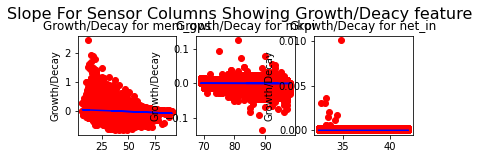

In [254]:
plot_growth_decay(growth_decay)

In [242]:
def plot_rate_growth_decay(feature):
    columns=list(feature.values())
    def best_fit_slope_and_intercept(xs,ys):
        m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
            ((mean(xs)*mean(xs)) - mean(xs*xs)))
        b = mean(ys) - m*mean(xs)
        return m, b
    for i in range(0,len(columns)):
        m,b=best_fit_slope_and_intercept(np.array(time_sec[2:]),np.array(columns[i]))
        regression_line = [(m*x)+b for x in np.array(time_sec[2:])]
        plt.subplot(2,3,i+1)
        plt.scatter(time_sec[2:],columns[i],color='red')
        plt.plot(time_sec[2:],regression_line,'b-')
        plt.title('Growth/Decay Rate for {}'.format(list(df1.columns)[i+2]))
        plt.ylabel('Growth/Decay Rate')
  
    plt.suptitle('Slope For Sensor Columns Showing Growth/Deacy Rate feature', fontsize=16)
    plt.show()
    plt.savefig('slope_with_rate_growth_decay.pdf') #, bbox_inches='tight'

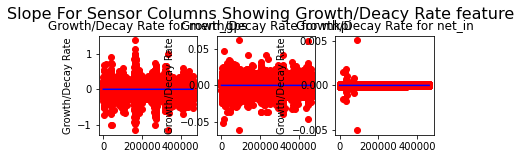

In [243]:
plot_rate_growth_decay(rate_growth_decay)

In [238]:
def Threshold_Counts(feature):
    cols=list(df1.columns)[2:]
    thresholds=list(feature[0].values())
    count=list(feature[1].values())
    plt.plot(cols,thresholds,'go',cols,count,'ro')
    red_patch = mpatches.Patch(color='red', label='Count')
    green_patch = mpatches.Patch(color='green', label='Threshold')
    plt.legend(handles=[red_patch,green_patch])
    plt.xlabel('Sensor Columns')
    plt.ylabel('No. of Counts')
    plt.title('No. of Elements Above Threshold(Mean) Value for Growth/Decay Corresponding to Each Sensor Column')
    plt.show()
    plt.savefig('Above_Threshold_Count_Growth.pdf') #, bbox_inches='tight'

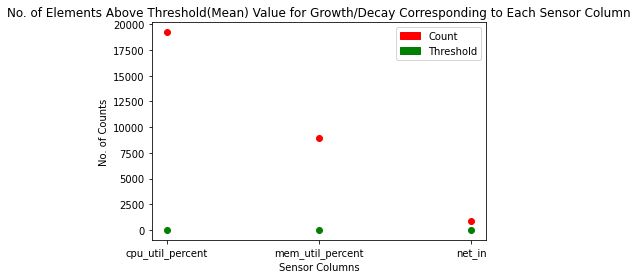

In [239]:
Threshold_Counts((threshold_growth_decay,count_decay_growth))

In [232]:
change_ovr_time,rate_of_change_ovr_time,growth_decay,rate_growth_decay,(threshold_growth_decay,count_decay_growth) = features()

Count of Growth/Decay value for each Sensor Column Values above or below a threshold value:
 {'cpu_util_percent': 19224, 'mem_util_percent': 8965, 'net_in': 864}


In [233]:
change_ovr_time.values()

dict_values([[-1.5, 0.5, 0.5, 0.0, -1.5, 2.0, -1.5, -0.5, 0.0, 0.0, 0.0, 1.0, -0.5, -1.0, -0.5, 0.0, 0.0, 1.0, 0.0, -0.5, -0.5, 1.0, 0.0, 1.5, -1.0, 0.5, 0.0, 0.0, -0.5, 1.0, -1.0, 0.0, 0.0, 2.0, 4.0, 2.0, 1.0, -2.0, -0.5, 1.0, 1.0, 1.0, 1.0, 0.0, 0.5, 0.0, 1.0, -1.5, 0.0, 0.5, -2.0, -2.0, 0.0, -0.5, 1.5, -2.0, 1.0, 1.0, 2.0, -2.0, -2.0, 0.0, 1.0, 3.0, -2.0, 0.5, -0.5, 0.5, 0.0, -1.5, -1.5, 1.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 1.0, -0.5, 0.5, -0.5, -1.5, 0.0, 0.0, -0.5, 4.5, -1.5, 0.5, -0.5, 0.0, 1.5, -1.0, 0.5, 1.5, -2.5, -1.5, 0.5, -0.5, 1.5, 0.0, 0.0, -0.5, 0.0, 0.0, 1.0, 1.0, 0.5, 1.0, 1.5, -3.0, -1.0, 0.5, 1.0, 1.0, -2.0, -0.5, 1.0, 2.0, -0.5, 0.5, -3.0, -1.5, 0.0, 0.5, 0.5, 0.5, -0.5, -1.5, -1.0, 1.0, 0.0, 2.0, -1.0, -1.0, -1.0, -0.5, -1.0, 0.5, -0.5, 2.0, 0.5, -1.0, 1.0, 0.0, 1.0, 0.0, 1.0, -2.5, 4.5, -2.0, 0.5, -0.5, 5.0, -3.5, -2.0, 2.0, 1.0, 1.0, -2.0, 0.0, -3.0, -0.5, 0.0, 0.0, 0.5, 0.5, -2.0, 2.0, 0.0, 0.0, 1.0, 0.5, 0.0, 0.5, -2.5, 0.5, 0.0, 0.5, 0.0, 0.5, 0.0

In [234]:
rate_of_change_ovr_time.values()

dict_values([[1.0, 0.0, -0.25, -0.75, 1.75, -1.75, 0.5, 0.25, 0.0, 0.0, 0.5, -0.75, -0.25, 0.25, 0.25, 0.0, 0.5, -0.5, -0.25, 0.0, 0.75, -0.5, 0.75, -1.25, 0.75, -0.25, 0.0, -0.25, 0.75, -1.0, 0.5, 0.0, 1.0, 1.0, -1.0, -0.5, -1.5, 0.75, 0.75, 0.0, 0.0, 0.0, -0.5, 0.25, -0.25, 0.5, -1.25, 0.75, 0.25, -1.25, 0.0, 1.0, -0.25, 1.0, -1.75, 1.5, 0.0, 0.5, -2.0, 0.0, 1.0, 0.5, 1.0, -2.5, 1.25, -0.5, 0.5, -0.25, -0.75, 0.0, 1.5, -0.75, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25, -0.75, 0.5, -0.5, -0.5, 0.75, 0.0, -0.25, 2.5, -3.0, 1.0, -0.5, 0.25, 0.75, -1.25, 0.75, 0.5, -2.0, 0.5, 1.0, -0.5, 1.0, -0.75, 0.0, -0.25, 0.25, 0.0, 0.5, 0.0, -0.25, 0.25, 0.25, -2.25, 1.0, 0.75, 0.25, 0.0, -1.5, 0.75, 0.75, 0.5, -1.25, 0.5, -1.75, 0.75, 0.75, 0.25, 0.0, 0.0, -0.5, -0.5, 0.25, 1.0, -0.5, 1.0, -1.5, 0.0, 0.0, 0.25, -0.25, 0.75, -0.5, 1.25, -0.75, -0.75, 1.0, -0.5, 0.5, -0.5, 0.5, -1.75, 3.5, -3.25, 1.25, -0.5, 2.75, -4.25, 0.75, 2.0, -0.5, 0.0, -1.5, 1.0, -1.5, 1.25, 0.25, 0.0, 0.25, 0.0, -1.25, 2.

# CONCLUSION
The plots shows each sensor values and features with correlation (slope) is provided.

The most appropriate sensors/features to be selected based on our variation-trend-capture-relationship approach would be then 'net_in', 'mem_util_percent' in the order of highest importance

The reasons are as follows:-

    1) It has moderate number of values above the threshold value (i.e., in our case mean).
    2) The column values mostly remain constant or increases over time as seen from the slope.
    3) The rate of change of column values remain constant or increases over time as seen from the slope.
    4) Maximum variation within the column values shows an increasing slope.
    5) It has constant decay slope.
    6) Rate of Decay is positive or constant.
    
From our method of array values evaluation, 
it can be observed that the various characteristics involved in each sensor/feature column 
help in selection of most appropriate sensor/feature column by observing the plot of the characteristics, and their corresponding slope.


# COMPARISON 

## The top variables in the order of importance 

### Top-4 features using PCA
'net_in', 'cpu_util_percent', 'mem_util_percent', 'cpu_util_percent'

### Top-4 features using IPCA
'net_in', 'cpu_util_percent', 'mem_util_percent', 'cpu_util_percent'

### Top features using variation-trend-relationship capture algorithm from MSDA package
'net_in', 'mem_util_percent'